In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import time

import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_openml # mnist veri seti için gerekli

mnist = fetch_openml("mnist_784")

In [110]:
data = mnist.data

In [111]:
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [112]:
data.shape

(70000, 784)

In [113]:
# Projemizde kullanacağımız MNIST elyazısı rakamları veritabanında(sklearn içinde gelmektedir) 784 feature sütunu mevcut (784 dimensions), 
# ve training set olarak 60,000 örnek veri ve a 10,000 örneklik test seti bulunmaktadır.

In [114]:
data[:10]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
# görselleri görmek için

def show_samples(data, index):
    digits = data.to_numpy()[index]
    digits_to_images = digits.reshape(28,28)

    plt.imshow(digits_to_images, cmap = "binary")
    plt.show()  

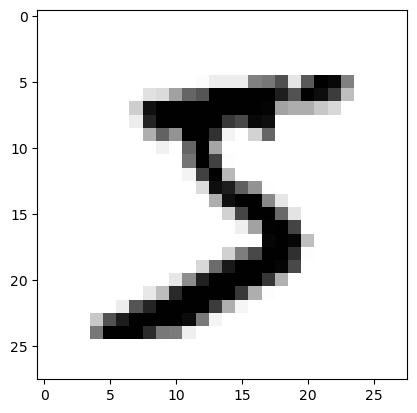

In [116]:
show_samples(data, 0)

In [117]:
# 70,000 image dosyası, her bir image için 784 boyut(784 feature) mevcut.

In [118]:
# Split the data -> train, test

train_img, test_img, train_lbl, test_lbl = train_test_split(data, mnist.target, test_size=0.2, random_state=0) 

In [119]:
print(type(train_img))
print(type(train_lbl))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [120]:
# Rakam tahminlerimizi check etmek için train_img dataframeini kopyalıyoruz, çünkü az sonra değişecek..
test_img_copy = test_img.copy()

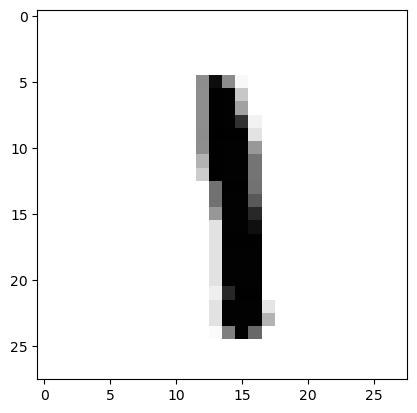

In [121]:
show_samples(test_img, 2)

In [122]:
# verimizi scale etmeliyiz, pca ve standard scale

scaler = StandardScaler()

train_img = scaler.fit_transform(train_img)

test_img = scaler.transform(test_img) # test verisi scale edilmez! Dikkat!

In [123]:
# PCA 

pca = PCA(.95) # variance'ın %95 oranında korunması

In [124]:
pca.fit(train_img)

PCA(n_components=0.95)

In [125]:
print(pca.n_components)
print(pca.n_components_) # 784->?

0.95
327


In [126]:
# Şimdi transform işlemiyle hem train hem de test veri setimizin boyutlarını 784'ten 327'e düşürelim:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [127]:
lr_1 = LogisticRegression()
lr_2 = LogisticRegression(solver="lbfgs") 

In [128]:

start_time_1 = time.time()
lr_1.fit(train_img, train_lbl)
end_time_1 = time.time()
total_time_1 = end_time_1 - start_time_1


In [129]:
print(f"lr_1 {total_time_1:.4f} sn sürdü.")

lr_1 5.3522 sn sürdü.


In [130]:

start_time_2 = time.time()
lr_2.fit(train_img, train_lbl)
end_time_2 = time.time()
total_time_2 = end_time_2 - start_time_2


In [131]:
print(f"lr_2 {total_time_2:.4f} sn sürdü.")

lr_2 5.2816 sn sürdü.


In [132]:
# default solver çok yavaş çalıştığı için daha hızlı olan 'lbfgs' solverı seçerek logisticregression nesnesi oluşturulabilir.

In [ ]:
# Ne kadar iyi eğitmiş bir bakalım..

In [133]:
lr_1.predict(test_img)

array(['0', '4', '1', ..., '7', '4', '6'], dtype=object)

In [134]:
lr_1.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

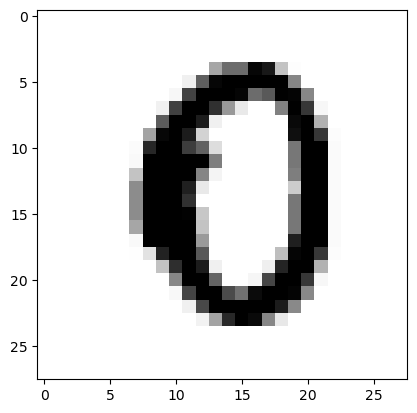

In [138]:
show_samples(test_img_copy,0)

In [140]:
lr_1.predict(test_img[1].reshape(1,-1))

array(['7'], dtype=object)

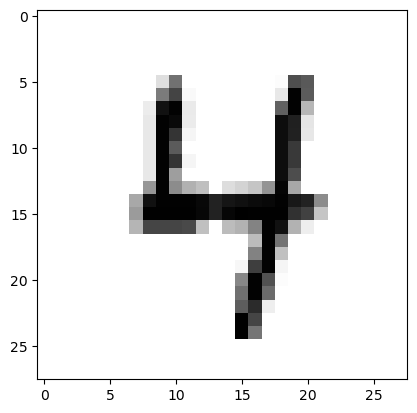

In [148]:
show_samples(test_img_copy,1)

In [144]:
lr_1.predict(test_img[9].reshape(1,-1))

array(['7'], dtype=object)

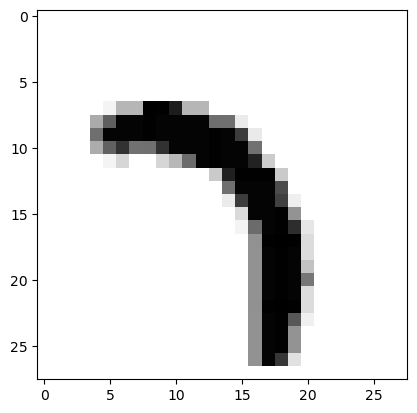

In [146]:
show_samples(test_img_copy,9)

In [150]:
lr_1.predict(test_img[20].reshape(1,-1))

array(['7'], dtype=object)

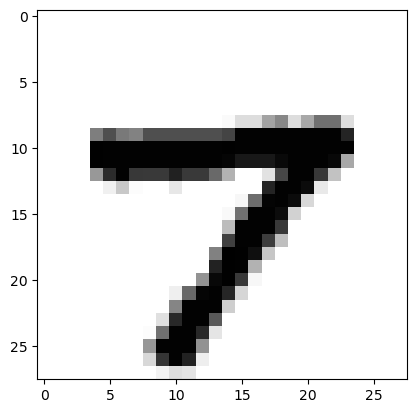

In [152]:
show_samples(test_img_copy,20)

In [154]:
lr_1.score(test_img,test_lbl) # Modelin doğruluk oranı (accuracy) ölçmek için score metodunu kullandık.

0.9187142857142857

In [ ]:
# Önemli not!

# StandardScaler().fit() ile ortalama (mean) ve standart sapma (std) hesaplanır.
# Model, sadece eğitim verisinden öğrendiği bu değerlerle çalışmalıdır.

# Test verisine, eğitim verisinden öğrenilen ortalama ve standart sapma ile aynı dönüşüm uygulanır.
# Test setini fit edersek, modele test setiyle ilgili bilgi sızdırmış oluruz (bu durum "data leakage" olarak bilinir).

# Yani Test verisi (test): Modelin performansını değerlendirmek için kullanılır. 
# Test verisi, eğitimi etkilememelidir. Yani test setinden bilgi almadan model eğitilmelidir.